In [19]:
import pandas as pd

In [20]:
shayneDf = pd.read_csv("/local/storage/rhlin_to_copy/CloneSeqExample/Mutations_Summary.txt", sep="\t")
sdf_a = shayneDf[shayneDf["Colony"] == "A"].sort_values(by = "Identifier")
sdf_a = sdf_a[ \
            ['ORF', 'Colony', 'Identifier', 'Desired Mutation Detected', \
             'Undesired Mutations Detected', 'Clean', 'Usable', 'Desired Mutation Score'] \
            ]
sdf_a = sdf_a.rename(columns = {"Desired Mutation Detected": "Status", \
                              "Undesired Mutations Detected": "Other Muts", "Usable": "Successful"}) \
                        .reset_index(drop=True)
sdf_a

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Desired Mutation Score
0,10002,A,10002_T743A_A,True,[],True,True,0.982169
1,10011,A,10011_G799A_A,True,[],True,True,1.004031
2,10016,A,10016_C1014G_A,True,[],True,True,0.998399
3,10037,A,10037_G1595C_A,True,[],True,True,0.936630
4,10037,A,10037_T1139G_A,True,[],True,True,1.061193
...,...,...,...,...,...,...,...,...
1654,9969,A,9969_G1228A_A,True,[],True,True,1.006391
1655,9970,A,9970_A377G_A,True,[],True,True,1.018272
1656,9989,A,9989_C596T_A,True,[],True,True,1.001226
1657,9990,A,9990_G1237A_A,True,"['G45T', 'A818G']",False,False,0.895919


In [21]:
df_a = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_A_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_a

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,A,10002_T743A_A,True,['10002_G6T'],False,False,-1.477841
1,10011,A,10011_G799A_A,True,['10011_G1317T'],False,False,-1.000000
2,10016,A,10016_C1014G_A,True,[],True,True,-3.120797
3,10037,A,10037_G1595C_A,True,[],True,True,-3.756581
4,10037,A,10037_T1139G_A,True,[],True,True,-0.030027
...,...,...,...,...,...,...,...,...
1654,9969,A,9969_G1228A_A,True,[],True,True,-5.741026
1655,9970,A,9970_A377G_A,True,[],True,True,0.000000
1656,9989,A,9989_C596T_A,True,['9989_C1242A'],False,False,-1.000000
1657,9990,A,9990_G1237A_A,True,"['9990_G45T', '9990_A818G']",False,False,-4.978176


In [22]:
df_wt = pd.read_csv(\
        "/local/storage/rhlin/ESP_7_output/ESP_7_WT_trimmed_Summary.txt", \
        sep="\t", header = None) \
        .rename(columns = {0: "ORF", 1: "Colony", 2: "Identifier", 3: "Status", 4: "Other Muts", \
                           5: "Clean", 6: "Successful", 7: "Score"}) \
        .sort_values(by = "Identifier") \
        .reset_index(drop=True)
df_wt

,ORF,Colony,Identifier,Status,Other Muts,Clean,Successful,Score
0,10002,W,10002_T743A_W,False,['10002_G6T'],False,False,-inf
1,10011,W,10011_G799A_W,False,['10011_G1317T'],False,False,-inf
2,10016,W,10016_C1014G_W,False,[],True,False,-inf
3,10037,W,10037_G1595C_W,False,[],True,False,-inf
4,10037,W,10037_T1139G_W,False,[],True,False,-inf
...,...,...,...,...,...,...,...,...
1654,9969,W,9969_G1228A_W,False,[],True,False,-inf
1655,9970,W,9970_A377G_W,False,[],True,False,-inf
1656,9989,W,9989_C596T_W,False,['9989_C1242A'],False,False,-inf
1657,9990,W,9990_G1237A_W,False,[],True,False,-744.440072


In [23]:
df_a["Identifier_new"] = df_a["Identifier"].apply(lambda x: x[0:-2])
df_wt["Identifier_new"] = df_wt["Identifier"].apply(lambda x: x[0:-2])
df_wt = df_wt.rename(columns = {"Other Muts": "Other Muts WT"})

In [24]:
df_merge = pd.merge(df_a, df_wt[["Identifier_new", "Other Muts WT"]].drop_duplicates(), on = ["Identifier_new"], how = "left")
df_merge["Other Muts"] = df_merge.apply(lambda row: list(set(eval(row["Other Muts"])) - set(eval(row["Other Muts WT"]))), axis = 1)

In [25]:
df_merge["Clean"] = df_merge["Other Muts"].apply(lambda x: len(x) == 0)

In [26]:
df_richard = df_merge.sort_values(by="Identifier")[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_richard

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_A,True,[],True,False
1,10011_G799A_A,True,[],True,False
2,10016_C1014G_A,True,[],True,True
3,10037_G1595C_A,True,[],True,True
4,10037_T1139G_A,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_A,True,[],True,True
1655,9970_A377G_A,True,[],True,True
1656,9989_C596T_A,True,[],True,False
1657,9990_G1237A_A,True,"[9990_A818G, 9990_G45T]",False,False


In [27]:
df_shayne = sdf_a[["Identifier", "Status", "Other Muts", "Clean", "Successful"]]
df_shayne

,Identifier,Status,Other Muts,Clean,Successful
0,10002_T743A_A,True,[],True,True
1,10011_G799A_A,True,[],True,True
2,10016_C1014G_A,True,[],True,True
3,10037_G1595C_A,True,[],True,True
4,10037_T1139G_A,True,[],True,True
...,...,...,...,...,...
1654,9969_G1228A_A,True,[],True,True
1655,9970_A377G_A,True,[],True,True
1656,9989_C596T_A,True,[],True,True
1657,9990_G1237A_A,True,"['G45T', 'A818G']",False,False


In [28]:
df_compare = pd.merge(df_richard, df_shayne, on = ["Identifier"], how = "left")
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: eval(x))
df_compare

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
0,10002_T743A_A,True,[],True,False,True,[],True,True
1,10011_G799A_A,True,[],True,False,True,[],True,True
2,10016_C1014G_A,True,[],True,True,True,[],True,True
3,10037_G1595C_A,True,[],True,True,True,[],True,True
4,10037_T1139G_A,True,[],True,True,True,[],True,True
...,...,...,...,...,...,...,...,...,...
1654,9969_G1228A_A,True,[],True,True,True,[],True,True
1655,9970_A377G_A,True,[],True,True,True,[],True,True
1656,9989_C596T_A,True,[],True,False,True,[],True,True
1657,9990_G1237A_A,True,"[9990_A818G, 9990_G45T]",False,False,True,"[G45T, A818G]",False,False


In [29]:
status = df_compare[df_compare["Status_x"] != df_compare["Status_y"]]

In [51]:
len(status)

12

In [31]:
def parse_variants(x):
    return sorted([item.split("_")[1] for item in x])
df_compare["Other Muts_x"] = df_compare["Other Muts_x"].apply(parse_variants)
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(lambda x: sorted(x))

In [62]:
def removeIndels(otherMuts):
    return [x for x in otherMuts if not "Gap" in x and not "Missing" in x]
df_compare["Other Muts_y"] = df_compare["Other Muts_y"].apply(removeIndels)

In [63]:
ot_comparison = df_compare[df_compare["Other Muts_x"] != df_compare["Other Muts_y"]]

In [64]:
ot_comparison

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
149,116_G531T_A,True,[A630G],False,False,True,[],True,True
161,11777_G1341T_A,True,"[C1431G, C1453A, G1423C, G1659A]",False,False,True,"[C1431G, C1453A, G1423C, G1659A, T1657C]",False,False
313,13939_C979T_A,True,[G722A],False,False,True,[],False,False
314,13939_G1223A_A,True,[G722A],False,False,True,[],False,False
334,14285_A1217T_A,False,[],True,False,False,[A1553T],False,False
416,162_A623T_A,True,[],True,True,True,[C596A],False,False
471,200_A1546G_A,True,[C1402A],False,False,True,[],True,True
472,200_C1517T_A,True,[C1402A],False,False,True,[],True,True
473,200_G229T_A,True,[C1402A],False,False,True,[],True,True
474,200_T26G_A,True,[C1402A],False,False,True,[],True,True


In [34]:
temp = ["A", "C"]
temp2 = "A"
test = "A"
if "A" in temp:
    print("temp")
if "A" in temp2:
    print("temp2")

temp
temp2


In [35]:
test = {"a": "T"}
"a" in test

True

In [40]:
df_compare[df_compare["Identifier"] == "14312_A703G_A"]

,Identifier,Status_x,Other Muts_x,Clean_x,Successful_x,Status_y,Other Muts_y,Clean_y,Successful_y
336,14312_A703G_A,True,[],True,True,True,[],True,True


In [42]:
import matplotlib.pyplot as plt

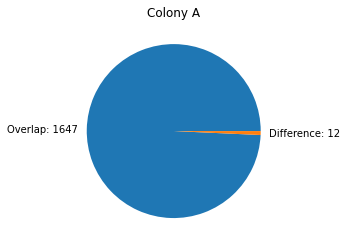

In [55]:
title = plt.title("Colony A")
pie_chart = plt.pie(x=[1647, 12], labels=["Overlap: 1647", "Difference: 12"])

In [65]:
len(ot_comparison)

43

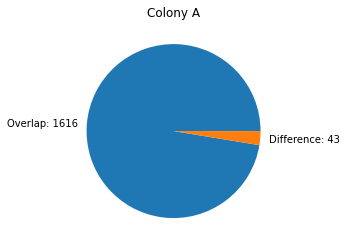

In [67]:
title = plt.title("Colony A")
pie_chart = plt.pie(x=[1616, 43], labels=["Overlap: 1616", "Difference: 43"])